In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import matplotlib as mpl
import glob
from astropy.time import Time
np.set_printoptions(precision=10)
import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(18.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = -5
    ymax = 15
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=4,prop={'size': 10})

## Data IONFR

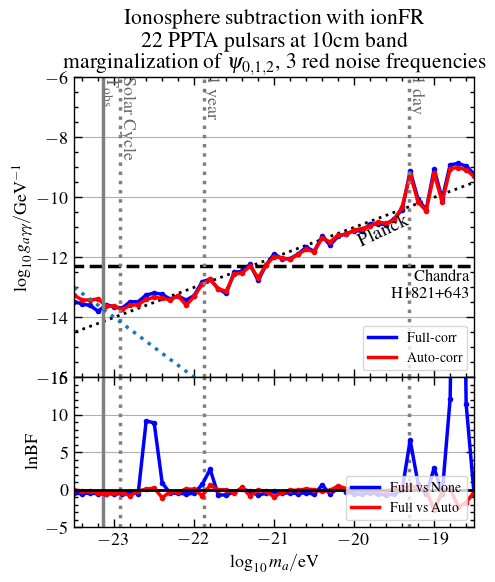

In [42]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-1.517, -1.781, -1.877, -1.943, -2.282, -2.387, -2.594, -2.555,
       -2.632, -2.558, -2.59 , -2.721, -2.869, -2.834, -3.254, -3.061,
       -2.75 , -2.694, -3.101, -3.289, -2.813, -2.877, -2.745, -3.239,
       -2.907, -2.73 , -2.872, -3.023, -2.956, -2.886, -3.072, -2.702,
       -2.948, -2.805, -2.894, -2.846, -2.897, -2.916, -2.88 , -3.024,
       -3.016, -2.671, -1.686, -2.721, -3.1  , -1.959, -3.012, -1.997,
       -2.062, -2.24 , -2.561])


ul_full = np.array([-1.73 , -1.912, -2.06 , -2.356, -2.235, -2.404, -2.547, -2.436,
       -2.535, -2.412, -2.445, -2.586, -2.85 , -2.844, -3.086, -3.029,
       -2.672, -2.683, -3.105, -3.359, -2.755, -2.825, -2.69 , -3.326,
       -2.906, -2.641, -2.905, -2.997, -2.947, -2.82 , -3.055, -2.658,
       -3.05 , -2.846, -2.872, -2.864, -2.981, -2.849, -2.945, -3.064,
       -2.965, -2.766, -1.582, -2.626, -3.075, -1.814, -2.915, -1.871,
       -1.927, -2.114, -2.48 ])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Ionosphere subtraction with ionFR\n 22 PPTA pulsars at 10cm band\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.015, -0.144, -0.209, -0.375, -0.531, -0.382, -0.379, -0.782,
       -0.129,  0.08 ,  0.255, -1.053, -0.244, -0.307,  0.115,  0.072,
       -0.78 ,  0.591,  0.013,  0.016, -0.427,  0.338, -0.828, -0.029,
       -0.169, -0.948, -0.299, -0.03 , -0.075,  0.126,  0.005, -0.212,
       -0.075,  0.527,  0.174,  0.071, -0.034, -0.055, -0.05 , -0.135,
        0.078,  0.207,  0.53 ,  0.237, -0.018, -2.744, -0.2  ,  0.173,
       -2.254, -1.689, -0.275])


lbf_nf = np.array([-4.779e-01, -5.041e-01, -4.245e-01, -5.306e-01, -5.252e-01,
       -5.484e-01, -5.083e-01, -3.228e-01, -5.178e-01,        inf,
              inf,  9.360e-01, -4.495e-01, -4.221e-01, -5.796e-01,
       -4.400e-01,  7.165e-01,  2.729e+00, -6.618e-01, -6.957e-01,
       -2.708e-01,  1.155e-01, -1.972e-01, -7.170e-01, -4.325e-01,
       -1.932e-01, -4.528e-01, -3.861e-01, -5.209e-01, -3.674e-01,
       -6.014e-01,  6.435e-01, -5.572e-01,  2.327e-01, -2.214e-01,
       -5.726e-01, -5.753e-01, -3.535e-01, -5.853e-01, -6.655e-01,
       -6.077e-01,  5.128e-04,        inf,  7.524e-01, -6.186e-01,
              inf, -5.211e-01,        inf,        inf,        inf,
       -6.578e-01])

lbf_nf[45] = np.log(0.9332)+3
lbf_nf[9]  = np.log(1.1988)+9
lbf_nf[10] = np.log(0.9382)+9
lbf_nf[42] = np.log(1.9054)+6
lbf_nf[47] = np.log(1.1888)+12
lbf_nf[48] = np.log(0.4736)+85
lbf_nf[49] = np.log(0.5387)+12
make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


# Data NO_IONO

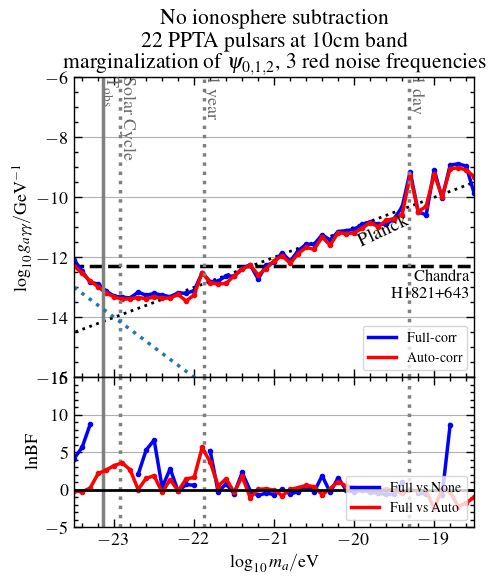

In [43]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-0.54 , -0.892, -1.243, -1.542, -1.845, -2.075, -2.253, -2.335,
       -2.395, -2.532, -2.577, -2.71 , -2.816, -2.793, -3.113, -3.008,
       -2.365, -2.799, -2.946, -3.025, -2.866, -2.759, -2.711, -3.145,
       -3.03 , -2.87 , -2.803, -3.156, -2.935, -2.823, -2.99 , -2.678,
       -3.048, -2.734, -2.864, -2.941, -2.884, -2.796, -3.041, -2.922,
       -2.963, -2.929, -1.718, -3.034, -2.957, -1.991, -2.829, -2.   ,
       -2.072, -2.242, -2.569])


ul_full = np.array([-0.337, -0.82 , -1.289, -1.444, -1.778, -2.052, -2.182, -2.308,
       -2.217, -2.419, -2.461, -2.616, -2.766, -2.742, -2.856, -2.863,
       -2.363, -2.768, -2.849, -2.771, -2.89 , -2.725, -2.706, -3.279,
       -2.923, -2.924, -2.7  , -3.089, -2.832, -2.723, -2.817, -2.605,
       -2.879, -2.695, -2.765, -2.824, -2.753, -2.776, -2.954, -3.056,
       -2.963, -2.676, -1.601, -3.036, -3.242, -1.837, -2.89 , -1.881,
       -1.939, -2.112, -3.127])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("No ionosphere subtraction\n 22 PPTA pulsars at 10cm band\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-1.332e-01,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,  3.048e-02,  1.548e+00,
        1.876e+00, -3.336e-01,  1.375e+00, -1.561e-01,  1.470e+00,
        1.653e+00,  5.647e+00,  3.719e+00,  5.187e-01,  1.485e+00,
       -3.405e-01,  1.808e+00, -1.040e+00,  5.016e-02,  1.536e-01,
       -3.583e-02, -7.971e-01,  5.447e-02,  2.909e-01,  6.044e-01,
        4.175e-01, -6.561e-01,  1.577e-01,  1.108e+00,  4.871e-01,
        2.971e-01,  1.864e-01,  1.015e-01, -5.921e-02,  6.891e-02,
       -1.866e-03, -4.865e-01, -6.941e-02, -1.089e-01, -1.335e-01,
       -2.462e+00,  5.523e-02, -2.550e-01, -2.240e+00, -1.737e+00,
       -1.000e+00])
lbf_af[1:8] = np.array([-0.245,  0.235, 2.187,  2.629,  3.246,  3.599,  2.667])



lbf_nf = np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
        2.064,    inf,    inf,  0.316,  2.817, -0.2  ,  0.718,  0.599,
          inf,  5.217, -0.282,  0.814, -0.523,  2.317, -0.103, -0.743,
       -0.43 , -0.624,  0.109, -0.572, -0.232,  0.531, -0.256,  1.88 ,
       -0.336,  1.62 , -0.033, -0.297, -0.007, -0.297, -0.462, -0.619,
       -0.532,  0.994,    inf, -0.385, -0.559,    inf, -0.648,    inf,
          inf,    inf,    inf])
# lbf_nf[42] = np.log(4.3760) + 3
lbf_nf[0]  = np.log(0.4391) + 5
lbf_nf[1]  = np.log(1.9670) + 5
lbf_nf[2]  = np.log(5.6641) + 7
lbf_nf[9]  = np.log(1.3770) + 5
lbf_nf[10] = np.log(5.1074) + 5
lbf_nf[47] = np.log(5.4874) + 7

# lbf_nf[49] = np.log(2.0014) + 3
# lbf_nf[50] = np.log(0.5285)


make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf )
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


In [39]:
crit = np.where(lbf_nf>10)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T

array([[  3. , -23.2,   inf],
       [  4. , -23.1,   inf],
       [  5. , -23. ,   inf],
       [  6. , -22.9,   inf],
       [  7. , -22.8,   inf],
       [ 16. , -21.9,   inf],
       [ 42. , -19.3,   inf],
       [ 45. , -19. ,   inf],
       [ 48. , -18.7,   inf],
       [ 49. , -18.6,   inf],
       [ 50. , -18.5,   inf]])

In [40]:
crit

array([ 3,  4,  5,  6,  7, 16, 42, 45, 48, 49, 50])

# Mock Data

## -23.0

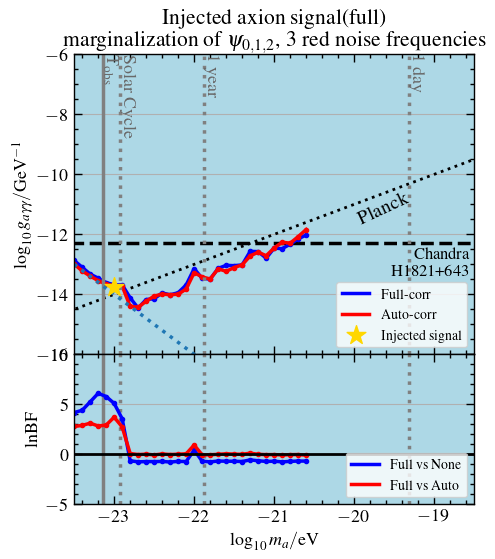

In [33]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,30)*0.1 -23.5


ul_auto = np.array([-1.247, -1.576, -1.848, -2.099, -2.317, -2.467, -2.579, -3.358,
       -3.486, -3.386, -3.314, -3.348, -3.469, -3.552, -3.479, -3.034,
       -3.275, -3.445, -3.204, -3.389, -3.362, -3.374, -3.175, -3.15 ,
       -3.369, -3.212, -3.118, -3.251, -3.133, -2.995])

ul_full = np.array([-1.125, -1.454, -1.781, -2.016, -2.264, -2.437, -2.537, -3.074,
       -3.514, -3.33 , -3.401, -3.31 , -3.471, -3.502, -3.344, -2.899,
       -3.325, -3.448, -3.191, -3.189, -3.3  , -3.375, -3.023, -3.131,
       -3.451, -3.214, -3.333, -3.285, -3.207, -3.178])


axes[0].scatter(-23,l10S_to_l10ga(-2.5,-23),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 2.785e+00,  2.895e+00,  3.115e+00,  2.838e+00,  2.929e+00,
        3.715e+00,  2.742e+00,  8.263e-02, -1.916e-02,  1.790e-02,
       -5.611e-02,  3.892e-02, -1.718e-02,  1.482e-02,  5.375e-02,
        9.312e-01, -5.362e-02, -3.660e-02,  2.021e-03,  5.851e-02,
        2.321e-02,  3.748e-03,  1.222e-01,  5.138e-03, -2.961e-02,
       -2.337e-02, -6.189e-02, -2.931e-02, -1.942e-02, -8.267e-02])


lbf_nf = np.array([ 4.182,  4.402,  5.248,  6.101,  5.784,  5.093,  3.566, -0.644,
       -0.749, -0.722, -0.725, -0.709, -0.768, -0.704, -0.718,  0.426,
       -0.688, -0.752, -0.669, -0.687, -0.692, -0.717, -0.555, -0.64 ,
       -0.709, -0.687, -0.751, -0.704, -0.669, -0.675])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


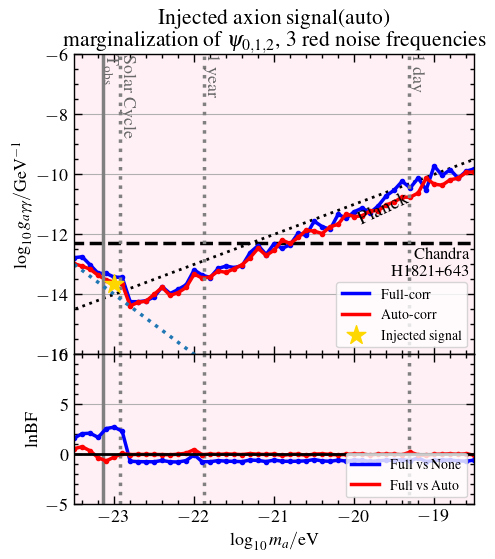

In [37]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.236, -1.415, -1.618, -1.922, -2.176, -2.351, -2.508, -3.339,
       -3.324, -3.382, -3.255, -3.126, -3.492, -3.499, -3.426, -3.08 ,
       -3.314, -3.379, -3.278, -3.424, -3.401, -3.369, -3.231, -3.022,
       -3.361, -3.283, -3.051, -3.261, -3.159, -3.021, -3.149, -3.329,
       -3.203, -3.22 , -2.977, -3.162, -3.24 , -3.172, -3.267, -3.177,
       -3.176, -3.118, -3.219, -3.177, -2.785, -3.083, -3.219, -3.136,
       -3.186, -3.094, -3.171])

ul_full = np.array([-1.034, -1.104, -1.475, -1.857, -1.957, -2.183, -2.288, -3.2  ,
       -3.301, -3.37 , -3.343, -3.103, -3.428, -3.394, -3.337, -2.942,
       -3.215, -3.395, -3.192, -3.213, -3.363, -3.4  , -3.062, -2.929,
       -3.328, -3.066, -3.326, -3.3  , -3.02 , -3.19 , -2.818, -3.098,
       -3.29 , -2.886, -3.125, -3.002, -2.983, -3.233, -3.11 , -2.875,
       -2.781, -2.586, -2.911, -2.679, -3.171, -2.475, -2.893, -2.798,
       -3.184, -3.051, -3.074])


axes[0].scatter(-23,l10S_to_l10ga(-2.4,-23),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lavenderblush')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(auto)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 0.567,  0.764,  0.349, -0.335, -0.658, -0.274,  0.087, -0.024,
       -0.006, -0.003, -0.013, -0.021, -0.038,  0.012,  0.118,  0.474,
       -0.034,  0.034, -0.01 ,  0.042,  0.014, -0.023,  0.079,  0.007,
       -0.01 ,  0.029, -0.108, -0.003,  0.018, -0.095,  0.027,  0.053,
       -0.007, -0.055, -0.003,  0.033,  0.04 , -0.071,  0.018,  0.019,
        0.017, -0.037,  0.224, -0.055, -0.115,  0.014,  0.02 ,  0.059,
        0.005,  0.063, -0.082])



lbf_nf = np.array([ 1.624,  2.073,  2.11 ,  1.698,  2.578,  2.722,  2.314, -0.688,
       -0.729, -0.742, -0.743, -0.612, -0.747, -0.763, -0.624, -0.038,
       -0.742, -0.732, -0.627, -0.68 , -0.705, -0.728, -0.563, -0.611,
       -0.722, -0.574, -0.688, -0.703, -0.686, -0.648, -0.522, -0.656,
       -0.697, -0.576, -0.682, -0.576, -0.601, -0.707, -0.642, -0.595,
       -0.612, -0.532, -0.627, -0.359, -0.72 , -0.615, -0.576, -0.572,
       -0.647, -0.69 , -0.572])


axes[1].set_facecolor('lavenderblush')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


In [36]:
crit = np.where(lbf_nf>10)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T


array([], shape=(0, 3), dtype=float64)

## -22.0

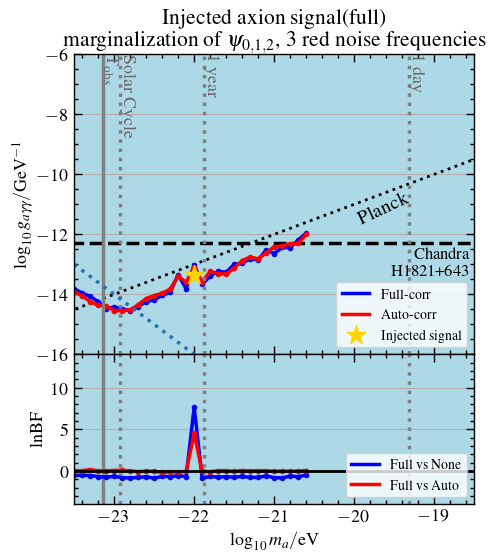

In [25]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,30)*0.1 -23.5


ul_auto = np.array([-2.17 , -2.411, -2.697, -2.923, -3.05 , -3.296, -3.398, -3.478,
       -3.402, -3.295, -3.297, -3.321, -3.281, -2.954, -3.254, -2.843,
       -3.44 , -3.194, -3.362, -3.482, -3.382, -3.229, -3.215, -3.372,
       -3.271, -3.172, -3.239, -3.269, -3.361, -3.159])

ul_full = np.array([-2.072, -2.312, -2.522, -2.803, -3.135, -3.184, -3.339, -3.506,
       -3.462, -3.4  , -3.437, -3.392, -3.388, -2.899, -3.47 , -2.775,
       -3.521, -3.344, -3.287, -3.42 , -3.26 , -3.32 , -3.268, -3.414,
       -3.172, -3.397, -3.292, -3.403, -3.244, -3.122])


axes[0].scatter(-22,l10S_to_l10ga(-3.1,-22),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 5.210e-02,  3.616e-02,  1.735e-01,  1.960e-02,  3.113e-02,
        5.986e-02,  9.045e-02,  1.600e-02, -8.230e-02, -1.180e-03,
       -2.712e-02, -1.768e-01, -8.871e-02, -1.241e-01, -5.599e-02,
        np.log(1.6813)+4, -1.290e-02, -9.113e-02,  4.910e-02,  3.365e-02,
       -3.885e-02,  5.949e-02,  1.042e-02,  4.211e-02,  3.059e-02,
       -3.411e-02, -8.377e-03, -2.402e-02, -2.614e-03,  6.018e-02])


lbf_nf = np.array([-0.528, -0.508, -0.542, -0.666, -0.74 , -0.649, -0.793, -0.846,
       -0.766, -0.684, -0.866, -0.633, -0.686, -0.551, -0.676,    np.log(38.7222)+4,
       -0.874, -0.65 , -0.738, -0.673, -0.751, -0.637, -0.771, -0.752,
       -0.589, -0.8  , -0.831, -0.6  , -0.689, -0.471])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


## -21.0

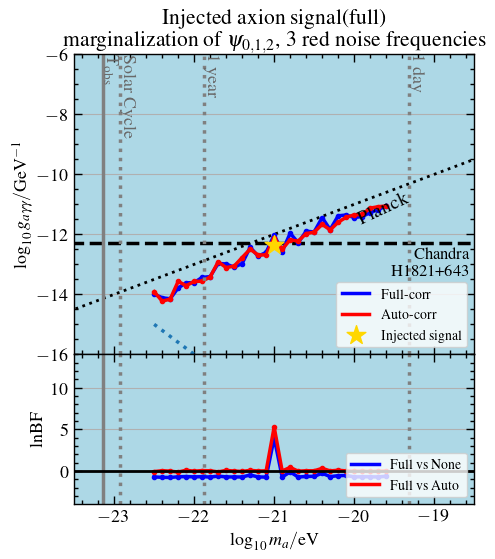

In [26]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(10,40)*0.1 -23.5


ul_auto = np.array([-3.169, -3.582, -3.617, -3.123, -3.369, -3.324, -3.419, -3.376,
       -2.971, -3.265, -3.314, -3.128, -2.948, -3.248, -3.338, -2.863,
       -3.354, -3.136, -3.284, -3.13 , -3.185, -3.023, -3.31 , -3.152,
       -3.087, -3.107, -3.191, -3.082, -3.135, -3.21 ])

ul_full = np.array([-3.248, -3.47 , -3.604, -3.342, -3.273, -3.364, -3.291, -3.364,
       -3.024, -3.145, -3.352, -3.328, -2.887, -3.284, -3.258, -2.774,
       -3.434, -2.916, -3.337, -3.051, -3.176, -2.799, -3.298, -2.938,
       -3.011, -3.195, -3.263, -3.229, -3.237, -3.196])


axes[0].scatter(-21,l10S_to_l10ga(-3.1,-21),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$, 3 red noise frequencies")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-7.013e-02,  3.893e-02, -1.775e-02, -1.236e-01,  9.300e-02,
       -2.192e-02,  5.077e-02,  2.726e-02, -1.079e-01,  7.647e-02,
       -2.417e-03, -5.394e-02,  8.064e-02,  1.917e-03,  2.059e-02,
        5.285e+00,  3.917e-03,  4.346e-01, -2.159e-02,  3.426e-02,
        2.526e-02,  3.214e-01,  1.359e-02,  9.300e-02,  1.442e-02,
       -2.726e-02, -1.592e-02, -5.478e-02, -2.276e-02, -1.009e-02])


lbf_nf = np.array([-0.71 , -0.757, -0.776, -0.689, -0.669, -0.703, -0.677, -0.724,
       -0.612, -0.707, -0.711, -0.714, -0.478, -0.71 , -0.731,  3.973,
       -0.718, -0.114, -0.718, -0.654, -0.636, -0.273, -0.67 , -0.558,
       -0.534, -0.706, -0.692, -0.692, -0.712, -0.627])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)
#plt.savefig("Figures/ul_bf_iono_10.pdf")
#plt.savefig("Figures/ul_bf_iono_10.jpg")


In [5]:
"""
import glob
import numpy as np
def getbf(burn = 0 , printit=True , folder="./"):
   files = sorted(glob.glob(folder+'*/chain_1.txt'))[::-1] + sorted(glob.glob(folder+"*/chain_1.0.txt"))[::-1]\
      + sorted(glob.glob(folder+'*/*/chain_1.txt'))[::-1] + sorted(glob.glob(folder+"*/*/chain_1.0.txt"))[::-1]
   res = []
   ys = []
   #l10ma = []
   np.set_printoptions(precision=3)
   for file in files:
      try:
         chain = np.loadtxt(file,skiprows=burn)
         ul = np.percentile( chain[:,-5],[5,32,50,68,95] )
         
         chain0 = chain[chain[:,0]<0]
         chain1 = chain[chain[:,0]>=0]

         if len(chain1) ==0 :
            ul1 = np.repeat(np.nan,5)
         else:
            ul1 = np.percentile(chain1[:,-5],[5,32,50,68,95])

         if len(chain0) ==0 :
            ul0 = np.repeat(np.nan,5)
         else:
            ul0 = np.percentile(chain0[:,-5],[5,32,50,68,95])

         try:
            bestfit = chain[np.argmax(chain[:,-4]),[-7,-6,-5]]
         except:
            bestfit=""

         try:
            dlnpos = chain[-1,-4].max()
         except:
            dlnpos = np.nan

         y = len(chain1)/len(chain)
         ys.append(y)
         res.append([ul0.tolist(),ul1.tolist(),ul.tolist()])
         if printit == True:
            print(file.split("/")[:-1],"|",np.histogram(chain[:,0],bins=[-1,0,1])[0],
            "|%.2f"%(ul0[-1]),"%.2f"%(ul1[-1]),"|%.4f"%(y/(1-y+1e-9)),"|%.2f"%dlnpos,"|",bestfit)
         #l10ma.append(float(file.split("/")[0].split("_")[-1]))

      except:
         if printit==True:
            print(file.split("/")[:-1],"|")
   ys = np.array(ys)
   lbf = np.log(ys/(1-ys));lbf = lbf.tolist()
   return res,lbf
"""

'\nimport glob\nimport numpy as np\ndef getbf(burn = 0 , printit=True , folder="./"):\n   files = sorted(glob.glob(folder+\'*/chain_1.txt\'))[::-1] + sorted(glob.glob(folder+"*/chain_1.0.txt"))[::-1]      + sorted(glob.glob(folder+\'*/*/chain_1.txt\'))[::-1] + sorted(glob.glob(folder+"*/*/chain_1.0.txt"))[::-1]\n   res = []\n   ys = []\n   #l10ma = []\n   np.set_printoptions(precision=3)\n   for file in files:\n      try:\n         chain = np.loadtxt(file,skiprows=burn)\n         ul = np.percentile( chain[:,-5],[5,32,50,68,95] )\n         \n         chain0 = chain[chain[:,0]<0]\n         chain1 = chain[chain[:,0]>=0]\n\n         if len(chain1) ==0 :\n            ul1 = np.repeat(np.nan,5)\n         else:\n            ul1 = np.percentile(chain1[:,-5],[5,32,50,68,95])\n\n         if len(chain0) ==0 :\n            ul0 = np.repeat(np.nan,5)\n         else:\n            ul0 = np.percentile(chain0[:,-5],[5,32,50,68,95])\n\n         try:\n            bestfit = chain[np.argmax(chain[:,-4]),[-7,